## Manejo básico de _music21_

Se debe tener las dependencias necesarias y la ruta de _musescore_:

Si se está en __COLAB__ se debe correr:

In [1]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb

Defaulting to user installation because normal site-packages is not writeable
Error: must run as root
Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [2]:
from music21 import *  #Importar todas las funciones de music21
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'  #Ruta de musescore
us['directoryScratch'] = '/tmp'

/usr/lib/python3/dist-packages/requests/__init__.py:87: RequestsDependencyWarning: urllib3 (2.0.4) or chardet (4.0.0) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


Ejemplo de lectura de de archivo en formato _xml_ \
(Se debe cambiar la ruta a donde se tenga el archivo o en su defecto subirlo al COLAB)
\
\
     pdta: En __COLAB__ se debe subir los archivos cada que se reinicie

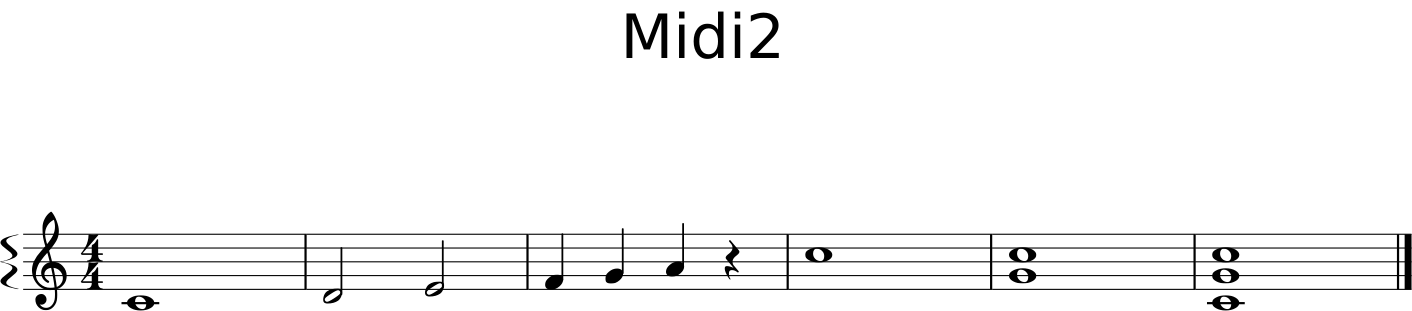

In [4]:
midi2 = converter.parse('../Archivos/XML_ejemplos/Midi2.xml')

midi2.show() #Mostrar la partitura

In [5]:
demy = converter.parse('../Archivos/Corales/De_Castro-A_demy_mort.xml')
demy.show('midi') #Mostrar en formato midi

In [6]:
#Definir una melodia y mostrarla en formato midi
littleMelody = converter.parse("tinynotation: 3/4 c4 d8 f g16 a g f#")
littleMelody.show('midi')

In [7]:
#Definir una nota y mostrarla en formato midi
nota = note.Note('C4')
nota.duration.type = 'half'
nota.show('midi')

__MUSIC21__ tiene cargados varios arhcivos en formatos _xml_ almacenados en el _corpus_

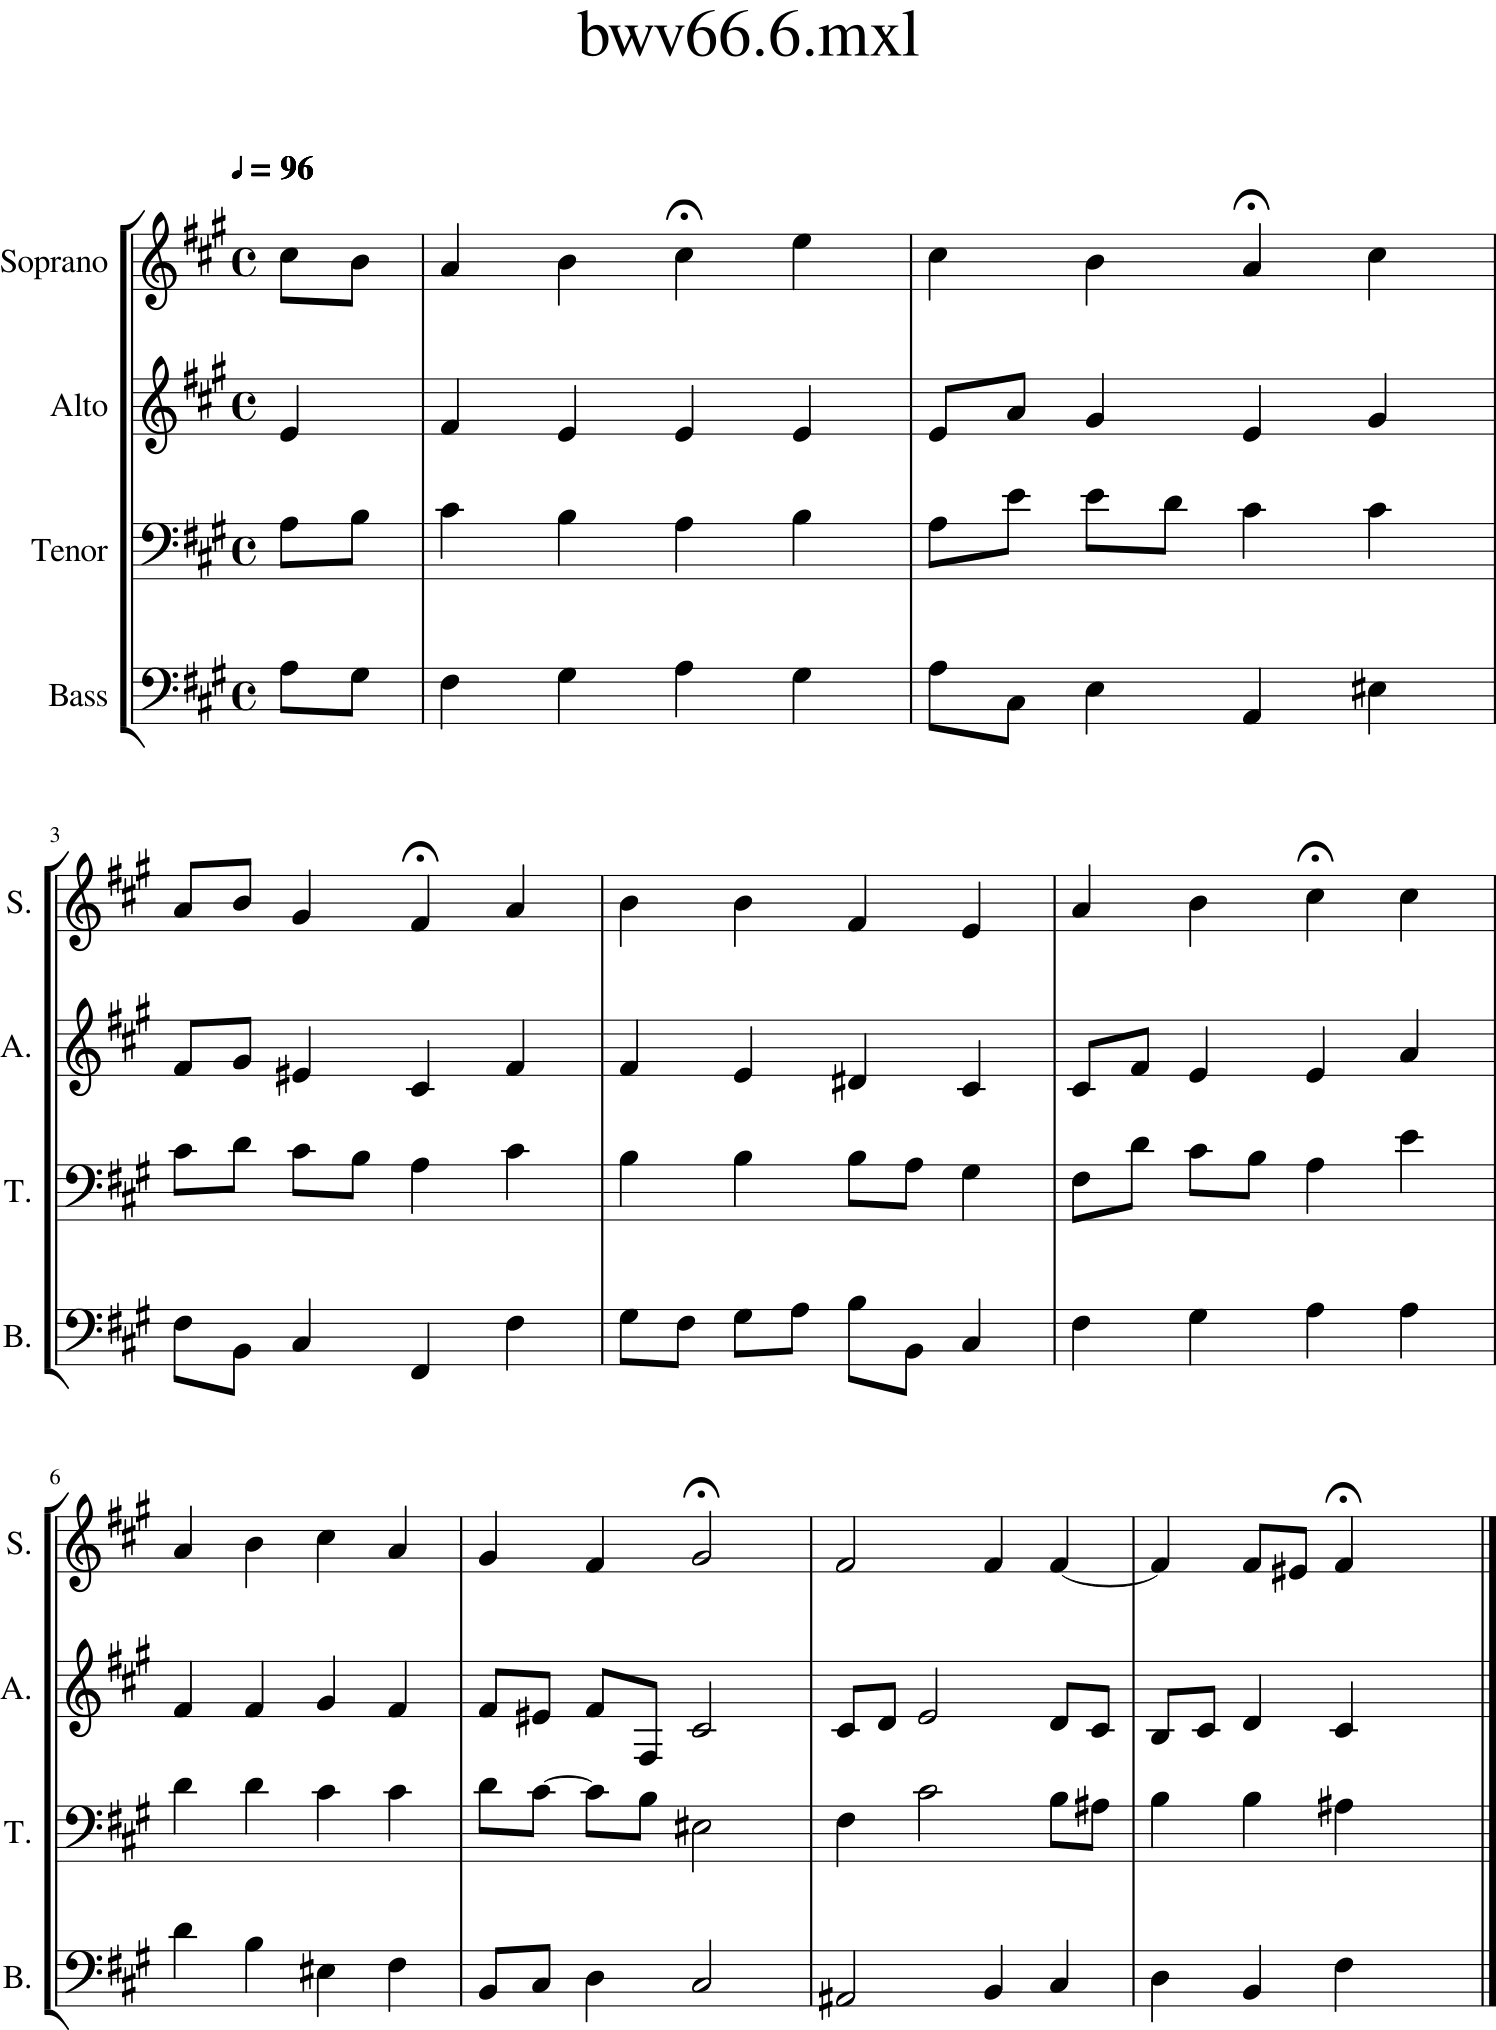

In [8]:
#Ejemplo de lectura 
s = corpus.parse('bach/bwv66.6')
s.show()

Podemos buscar todos los archivos _xml_ que están cargados de un compositor en particular

In [9]:
#Bethoven
paths_bethoven = corpus.getComposer('beethoven')
paths_bethoven

[PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus132.mxl'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus133.mxl'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement1.krn'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement1.mxl'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement2.krn'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement2.mxl'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement3.krn'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement3.mxl'),
 PosixPath('/home/cuba/.local/lib/python3.10/site-packages/music21/corpus/beethoven/opus18no1/movement4.krn'),
 PosixPath('/home/cuba/.l

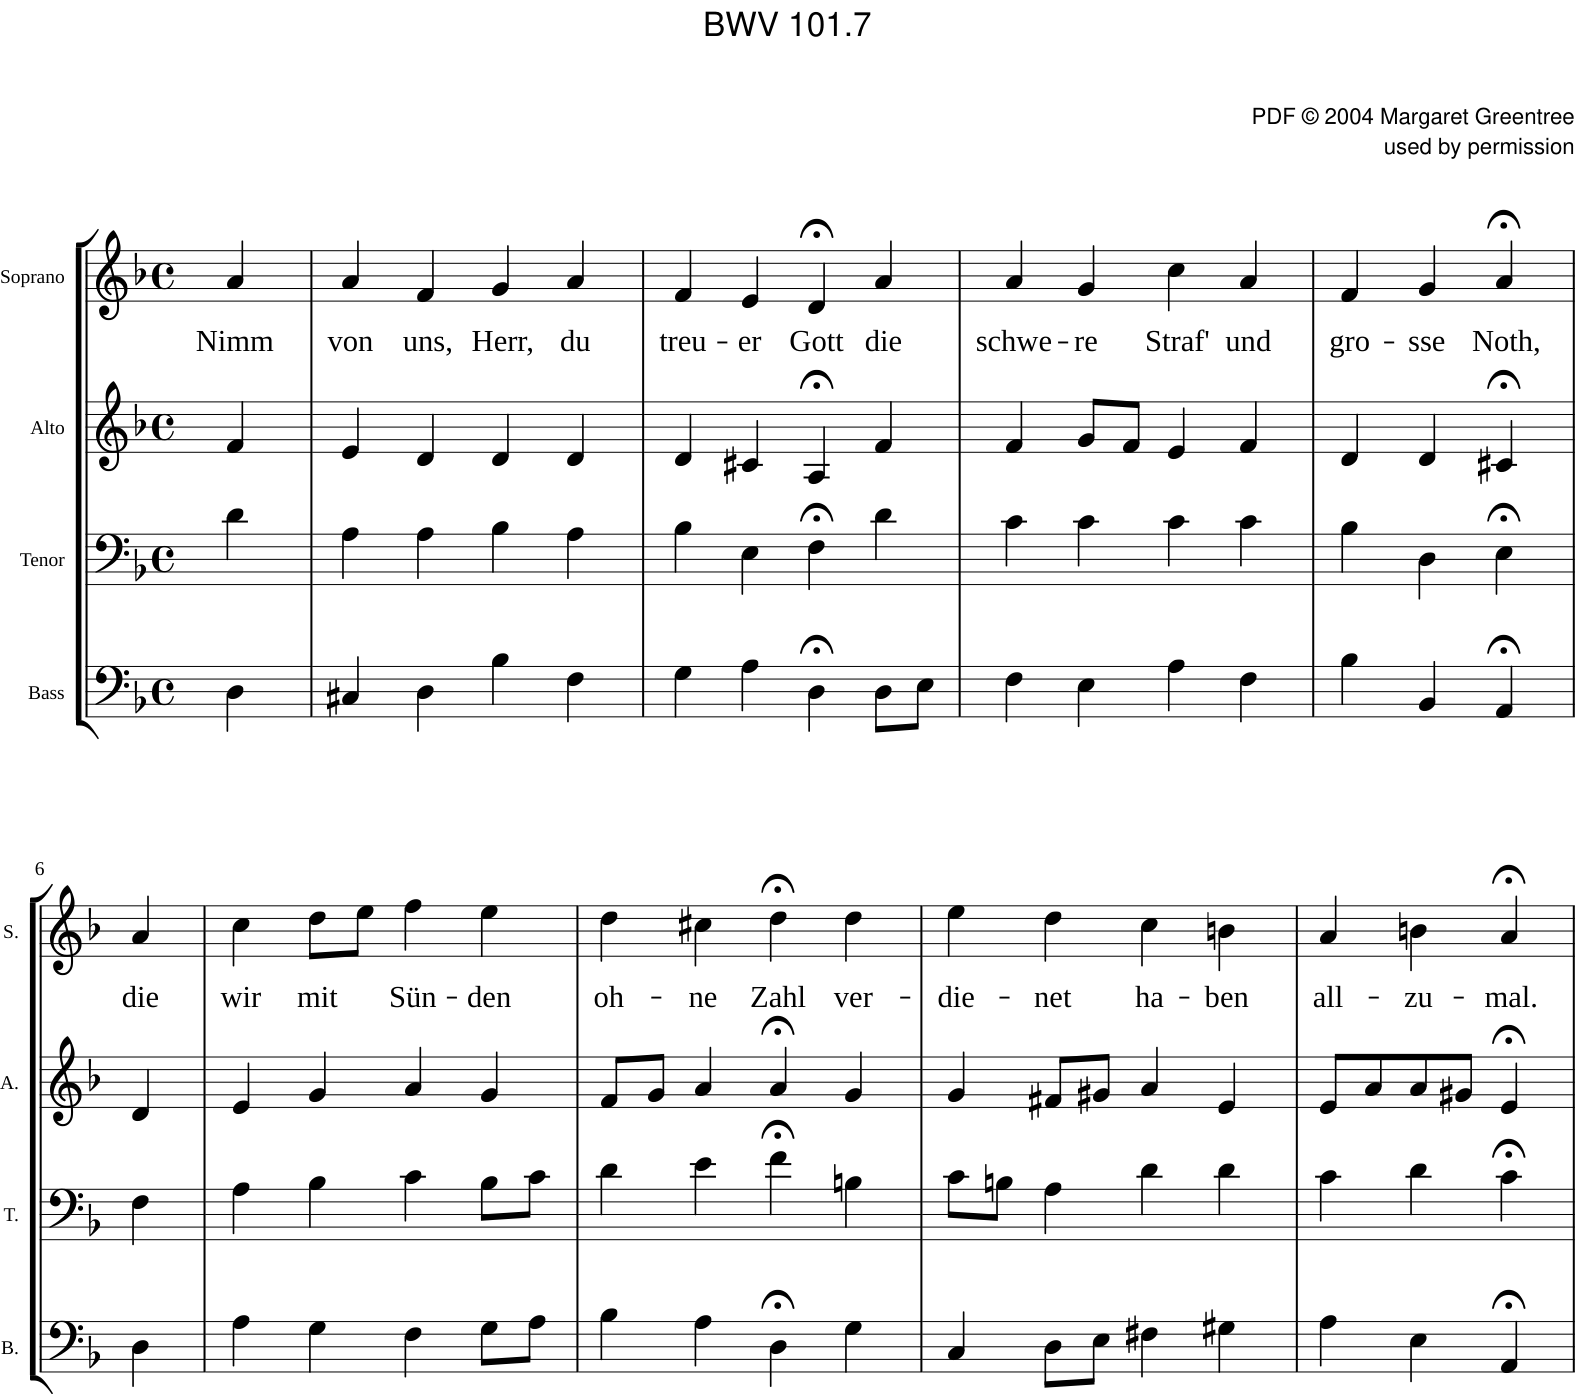

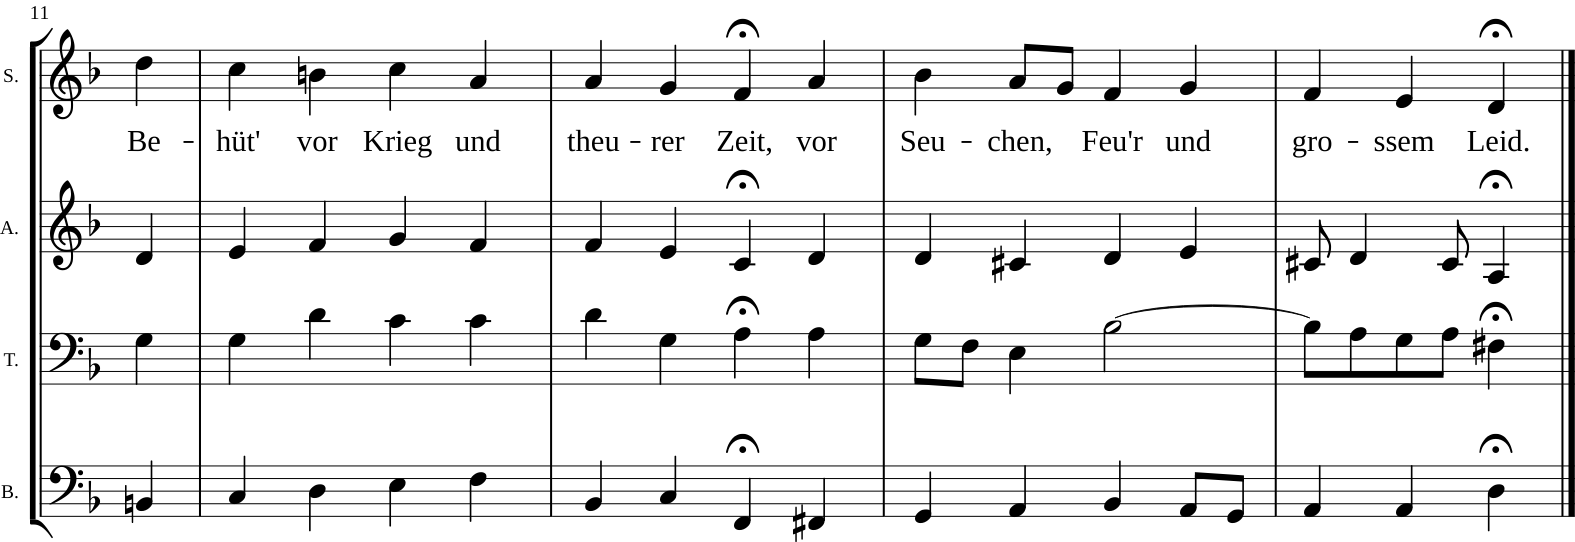

In [10]:
#Bach
paths_bach = corpus.getComposer('bach')
bach1 = converter.parse(paths_bach[2])
bach1.show()

In [11]:
#Definir acordes
cMajor = chord.Chord(["E3","C4","G4"])
cMajor.inversion() #Mirar en que inversión está el acorde

1

In [12]:
#Mirar la nota del bajo de un acorde
cMajor.bass()

<music21.pitch.Pitch E3>

In [13]:
#Nombre del acorde
cMajor.commonName

'major triad'

### Chordify 

Esta función nos permite agrupar todas las notas que dentro de la partitura suenan al mismo tiempo en un solo sistema

Partitura antes de aplicar el chordify:

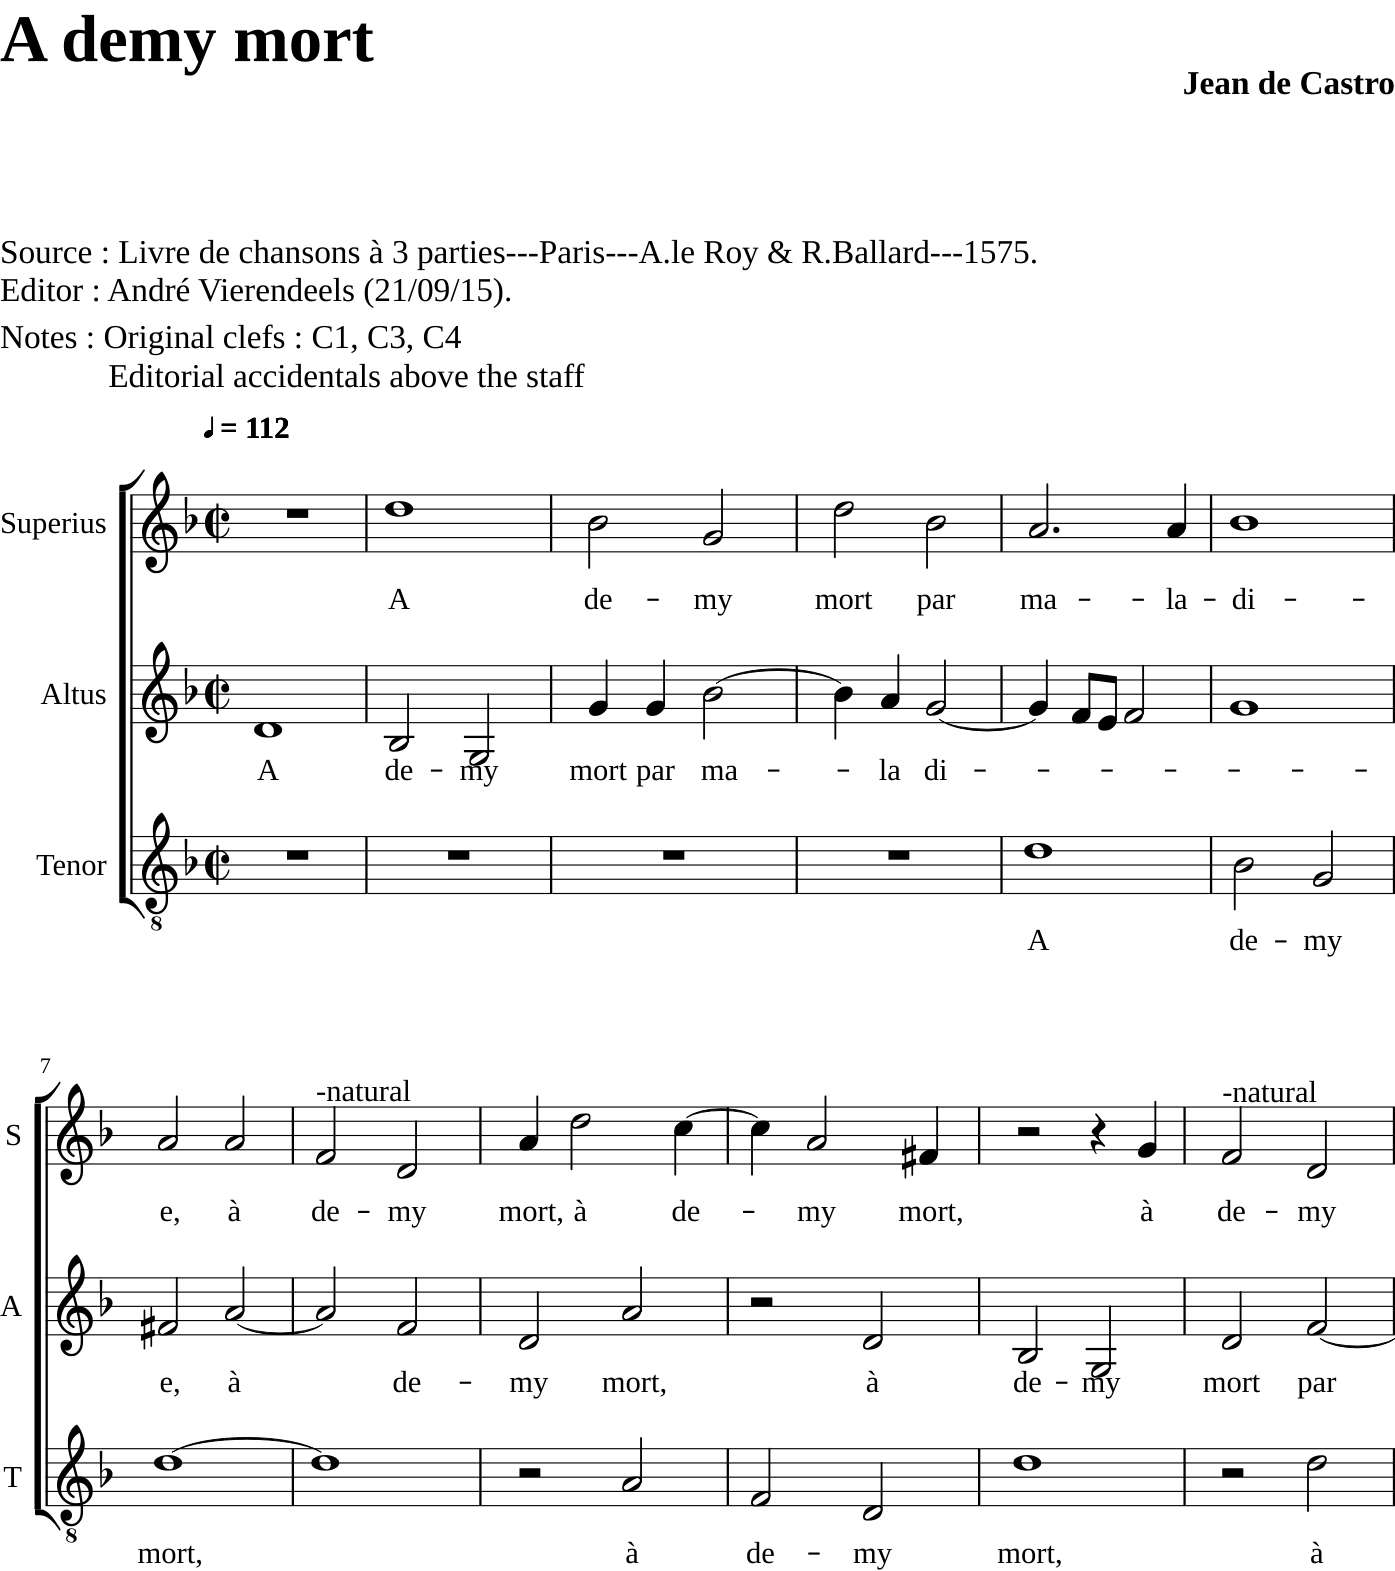

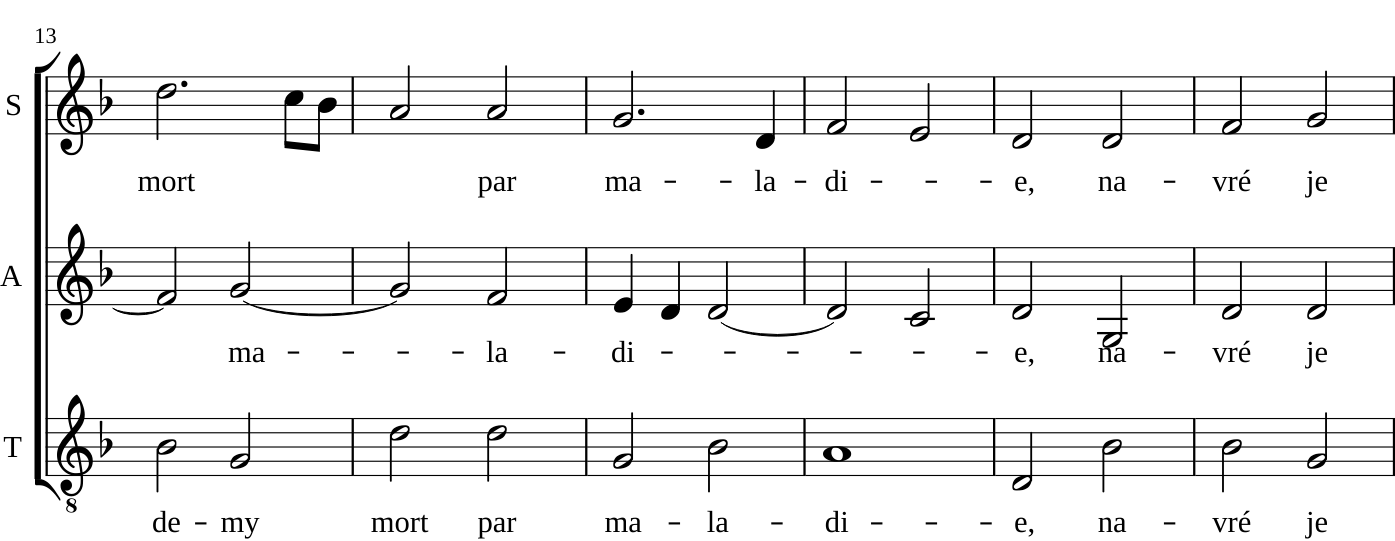

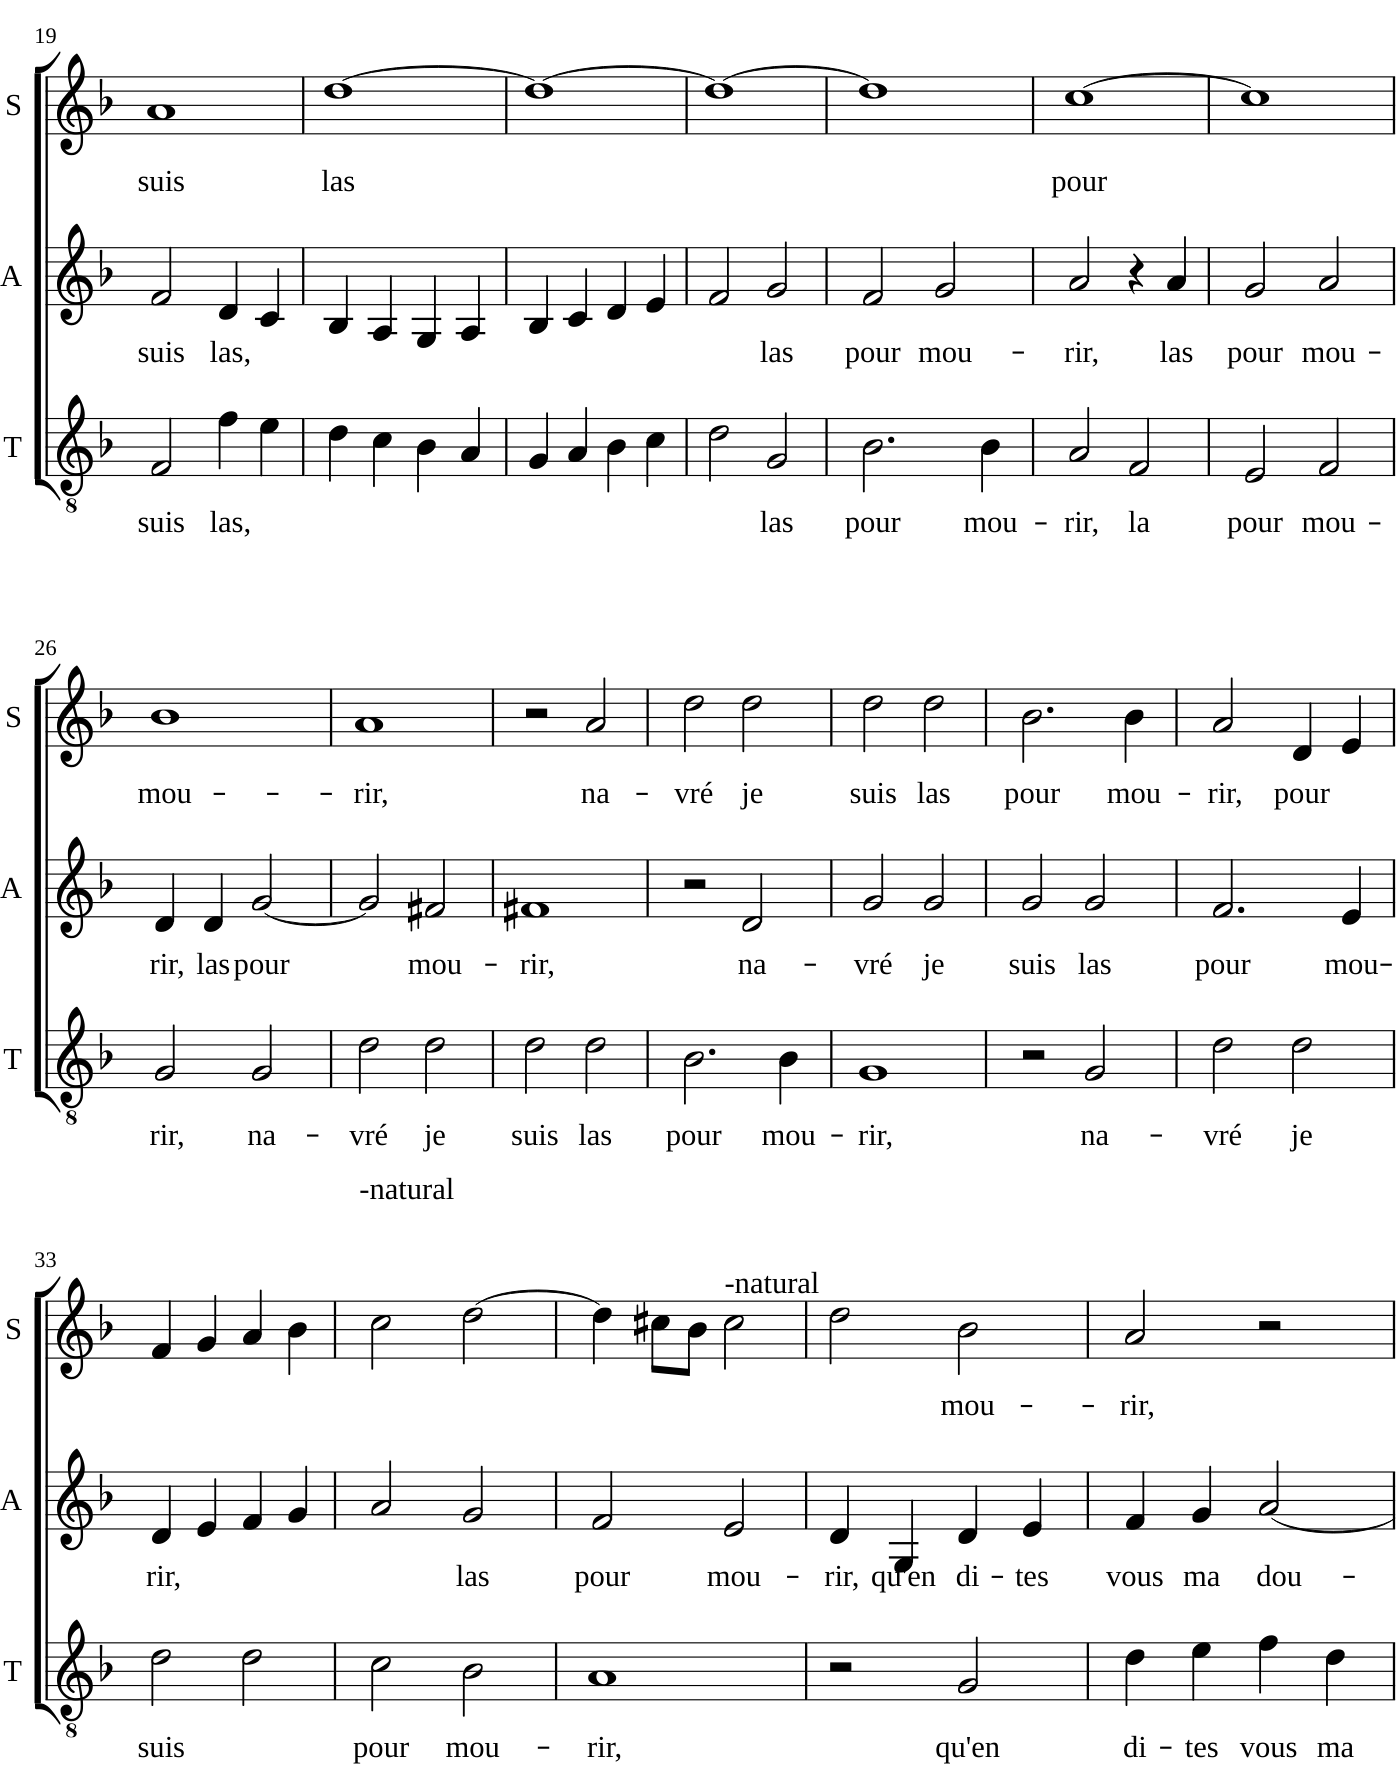

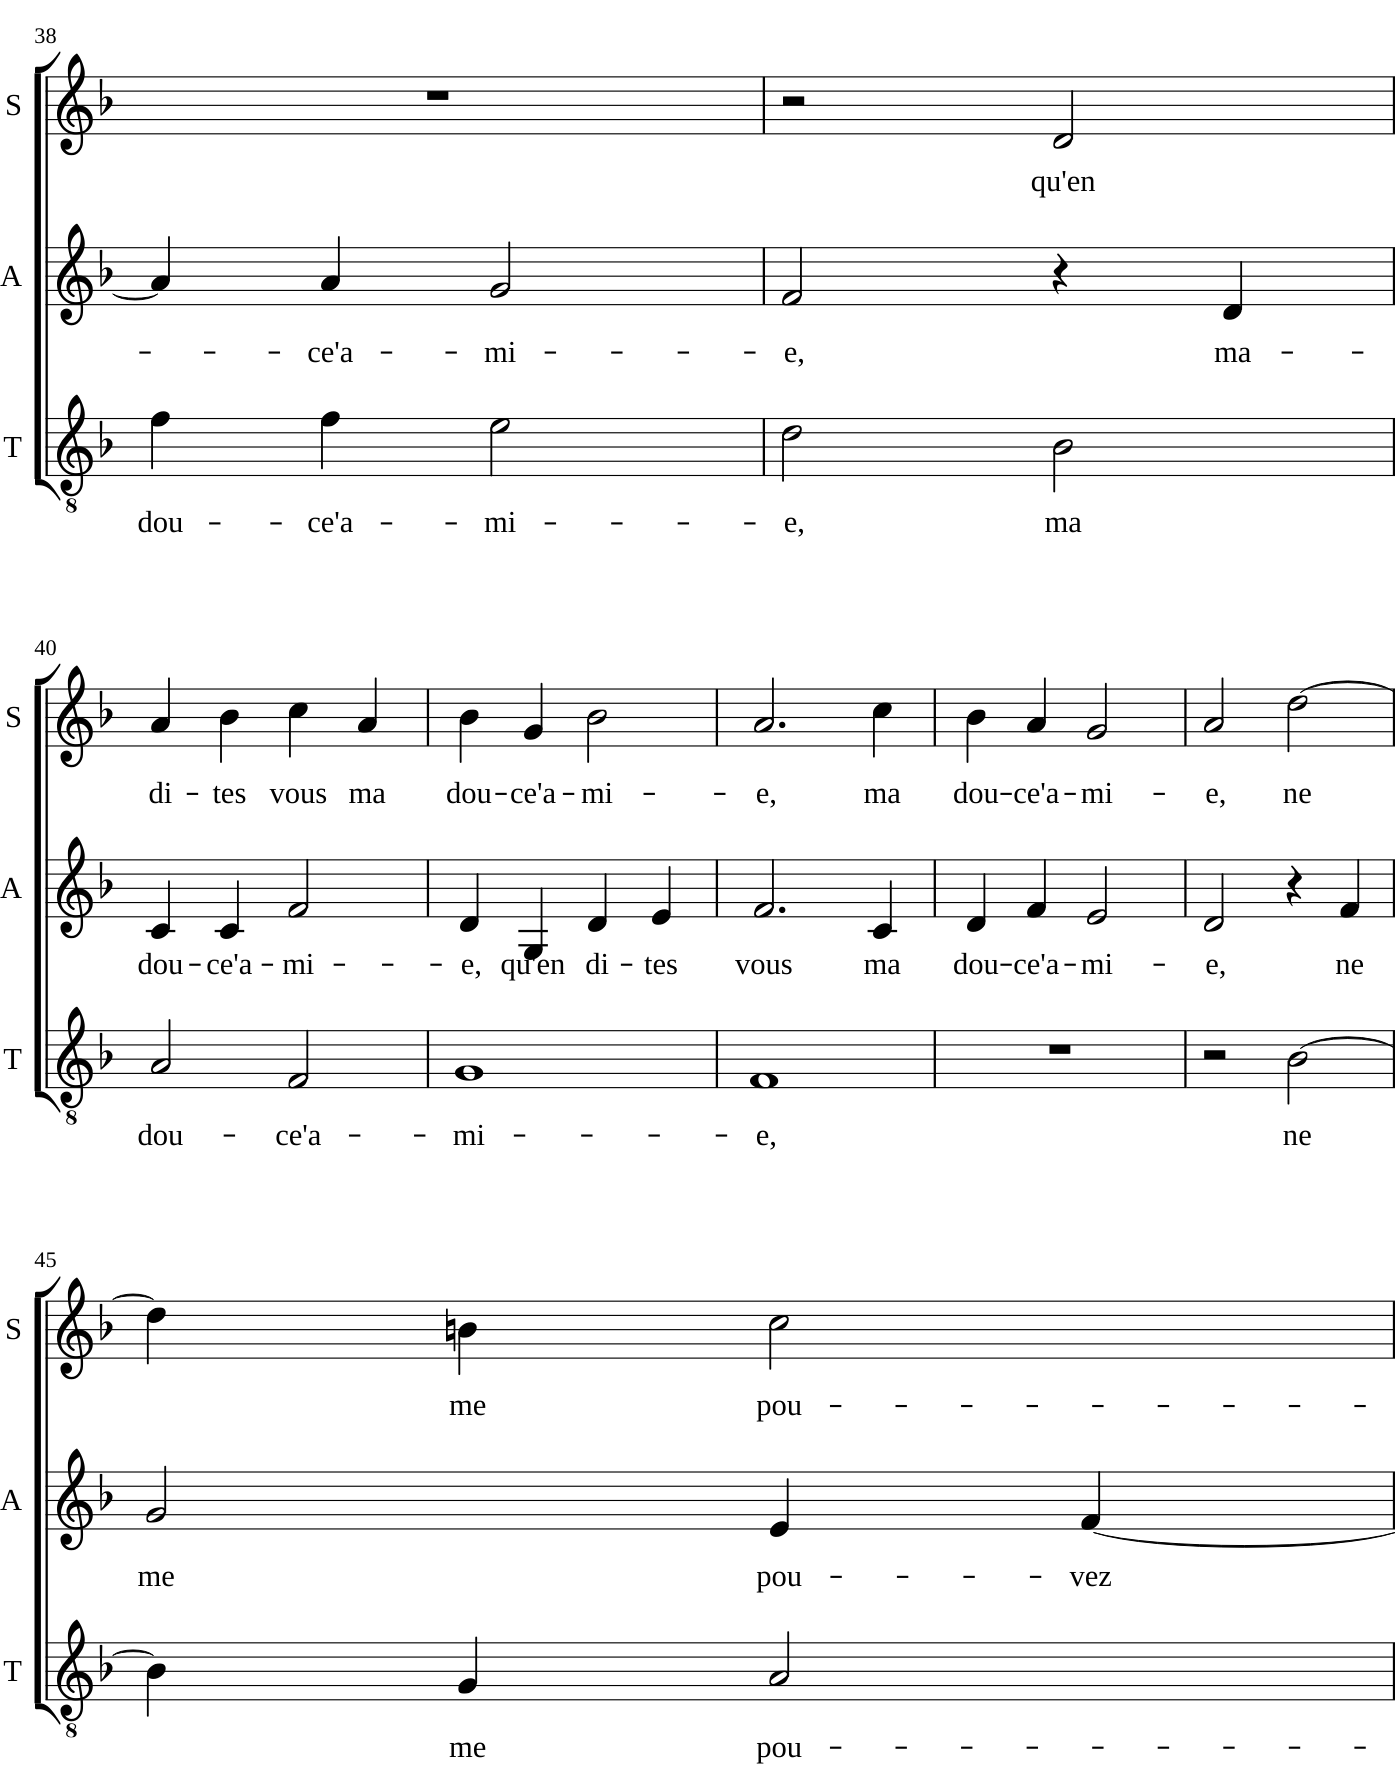

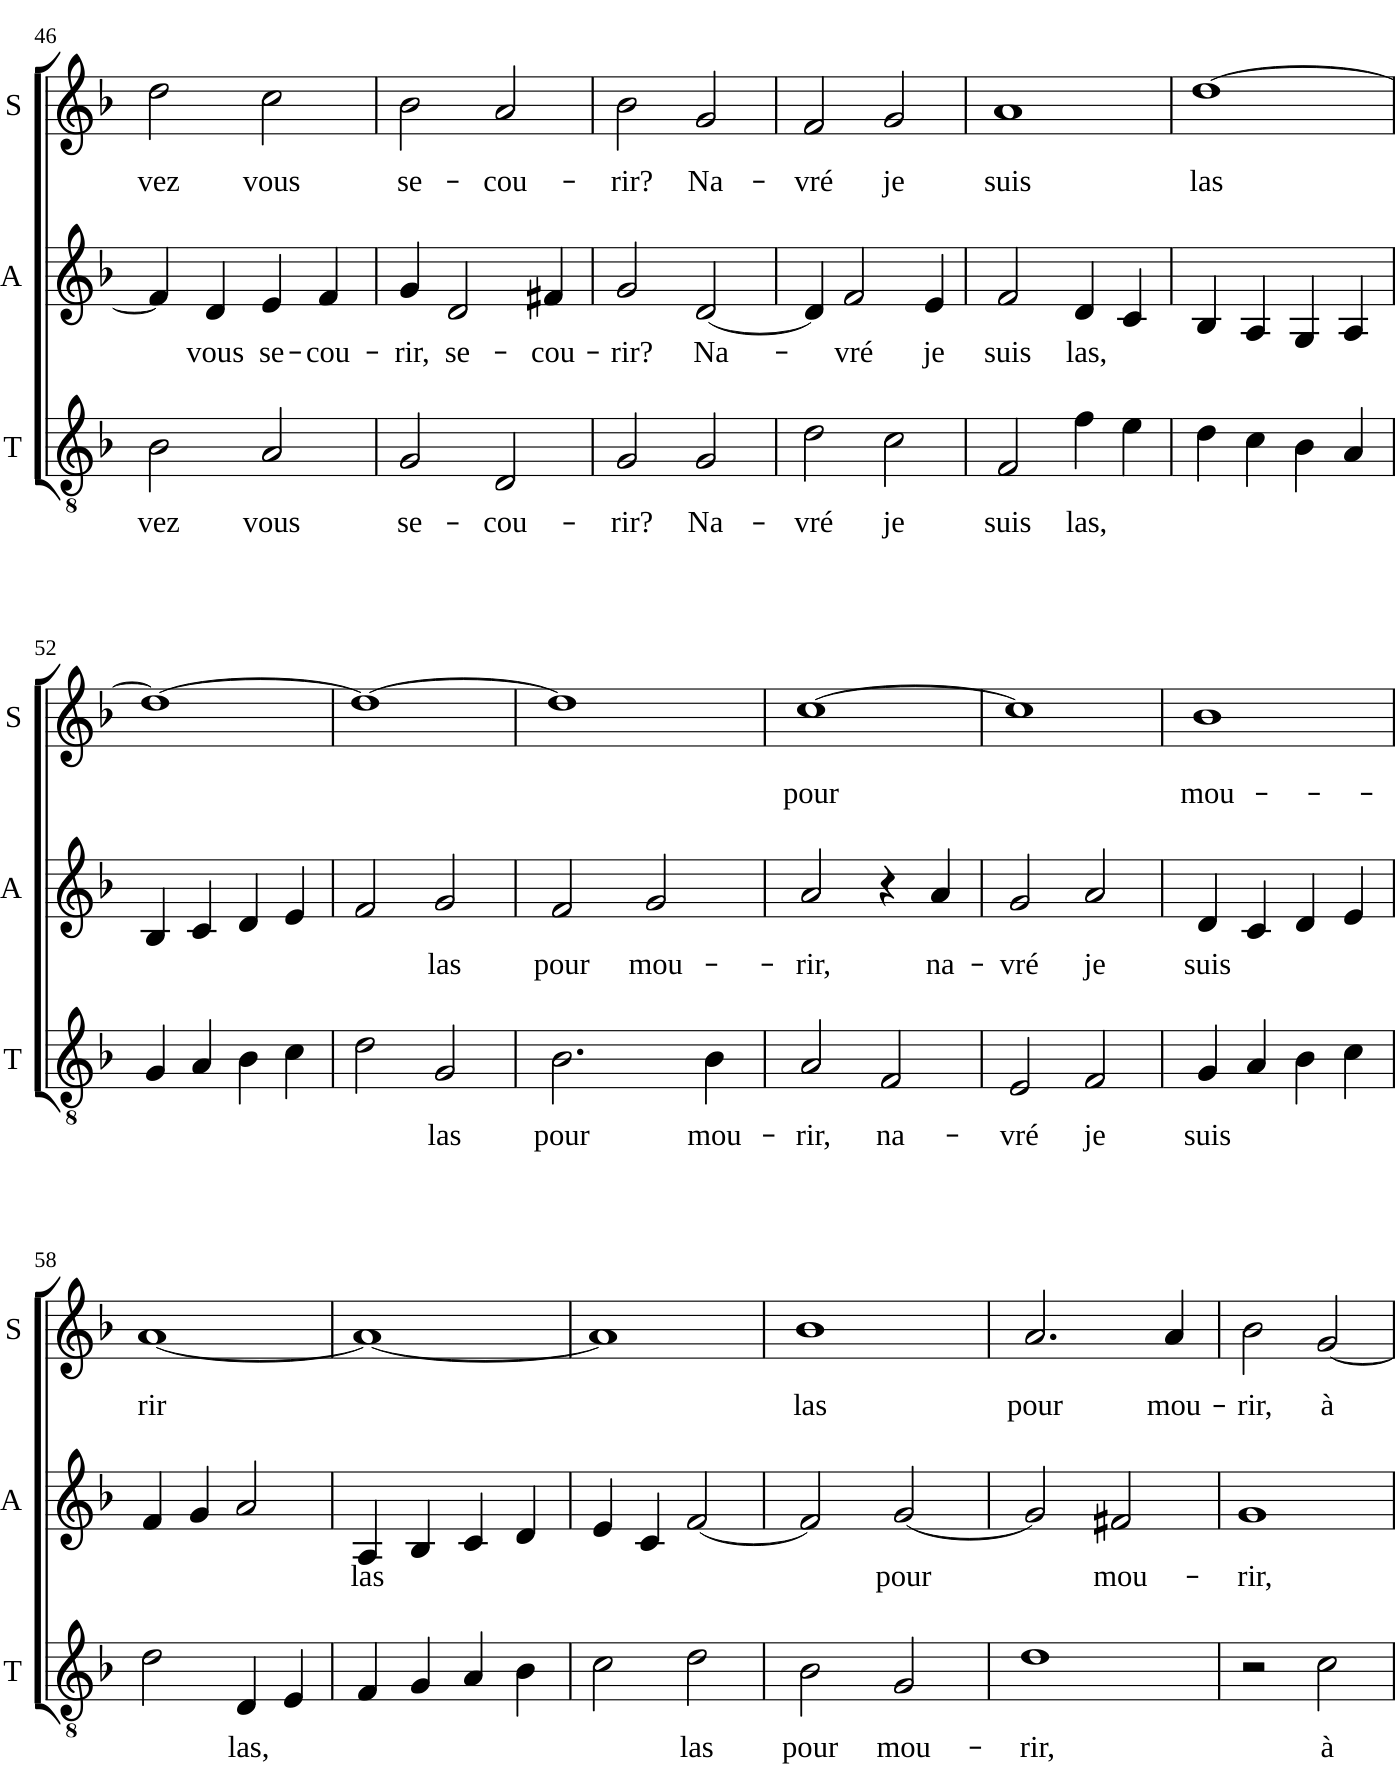

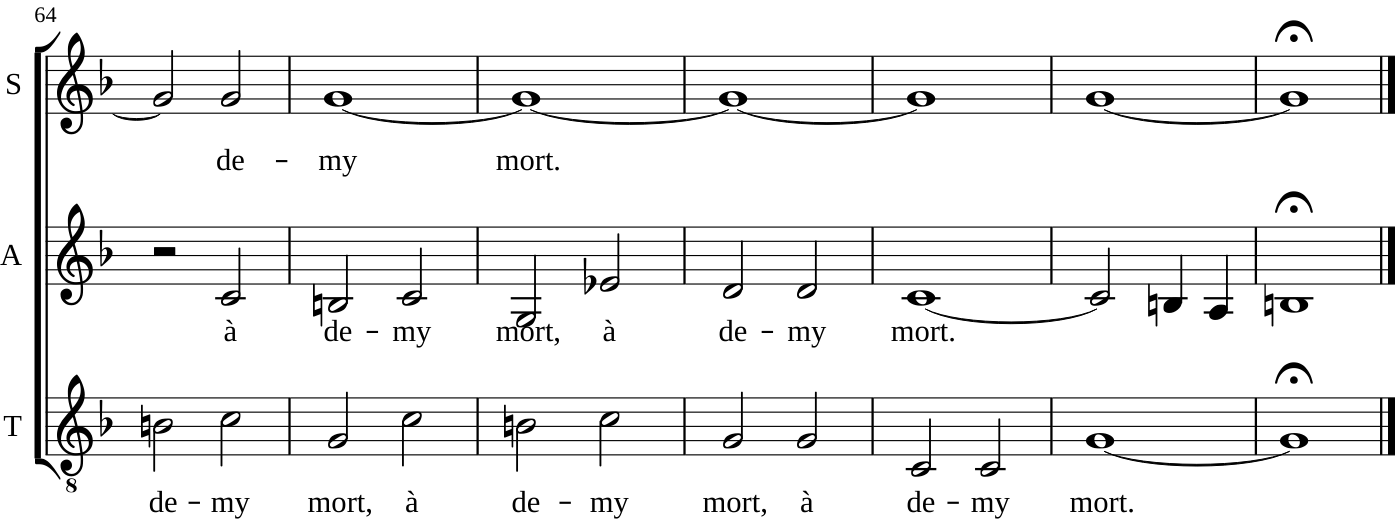

In [14]:
demy.show()

Al aplicar el chordify la partitura queda de la siguiente manera: 

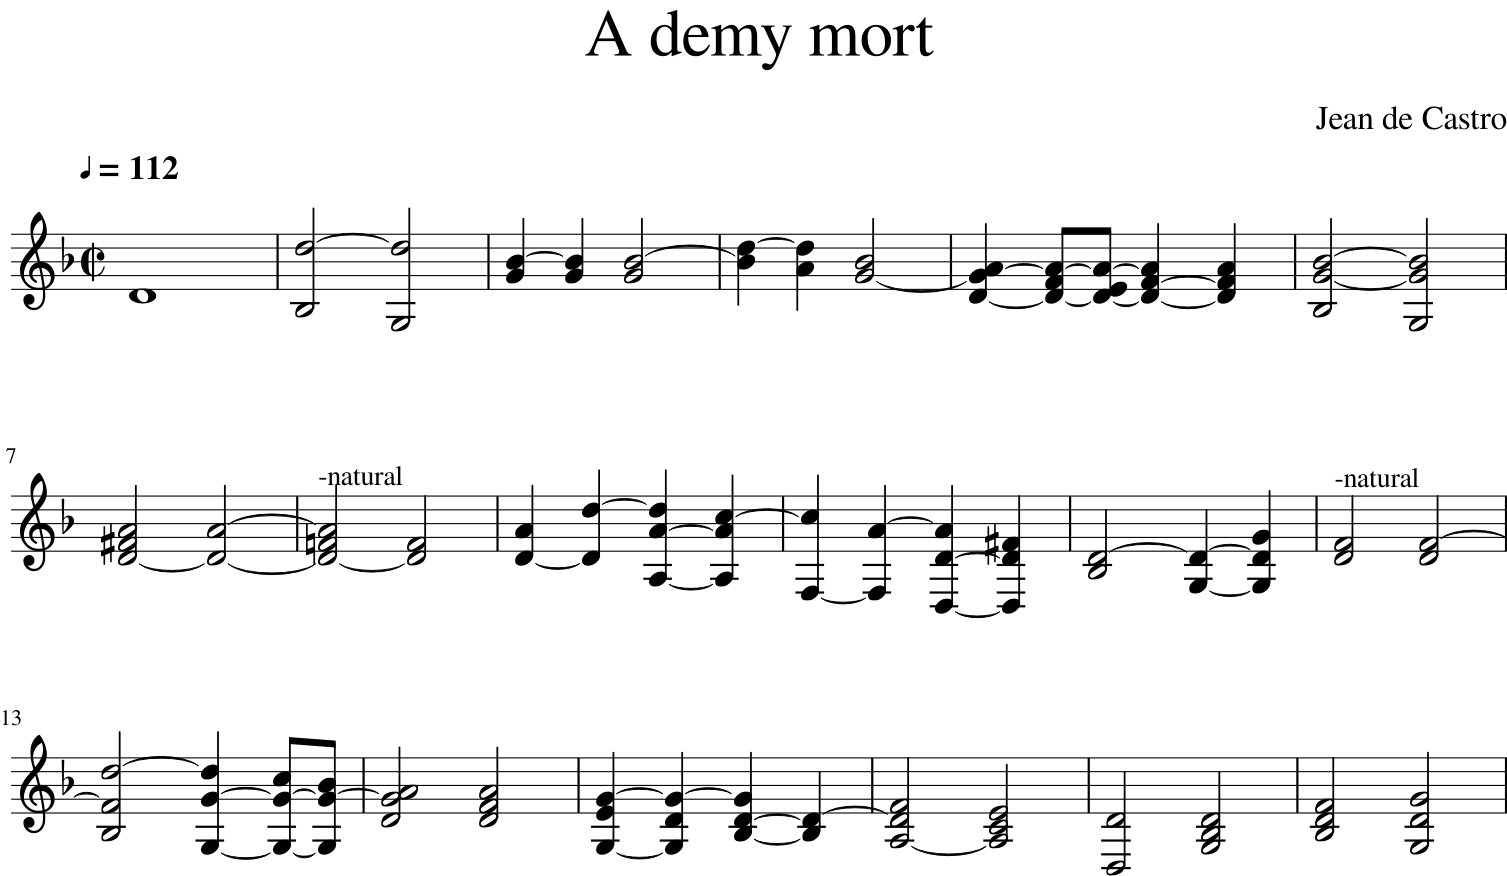

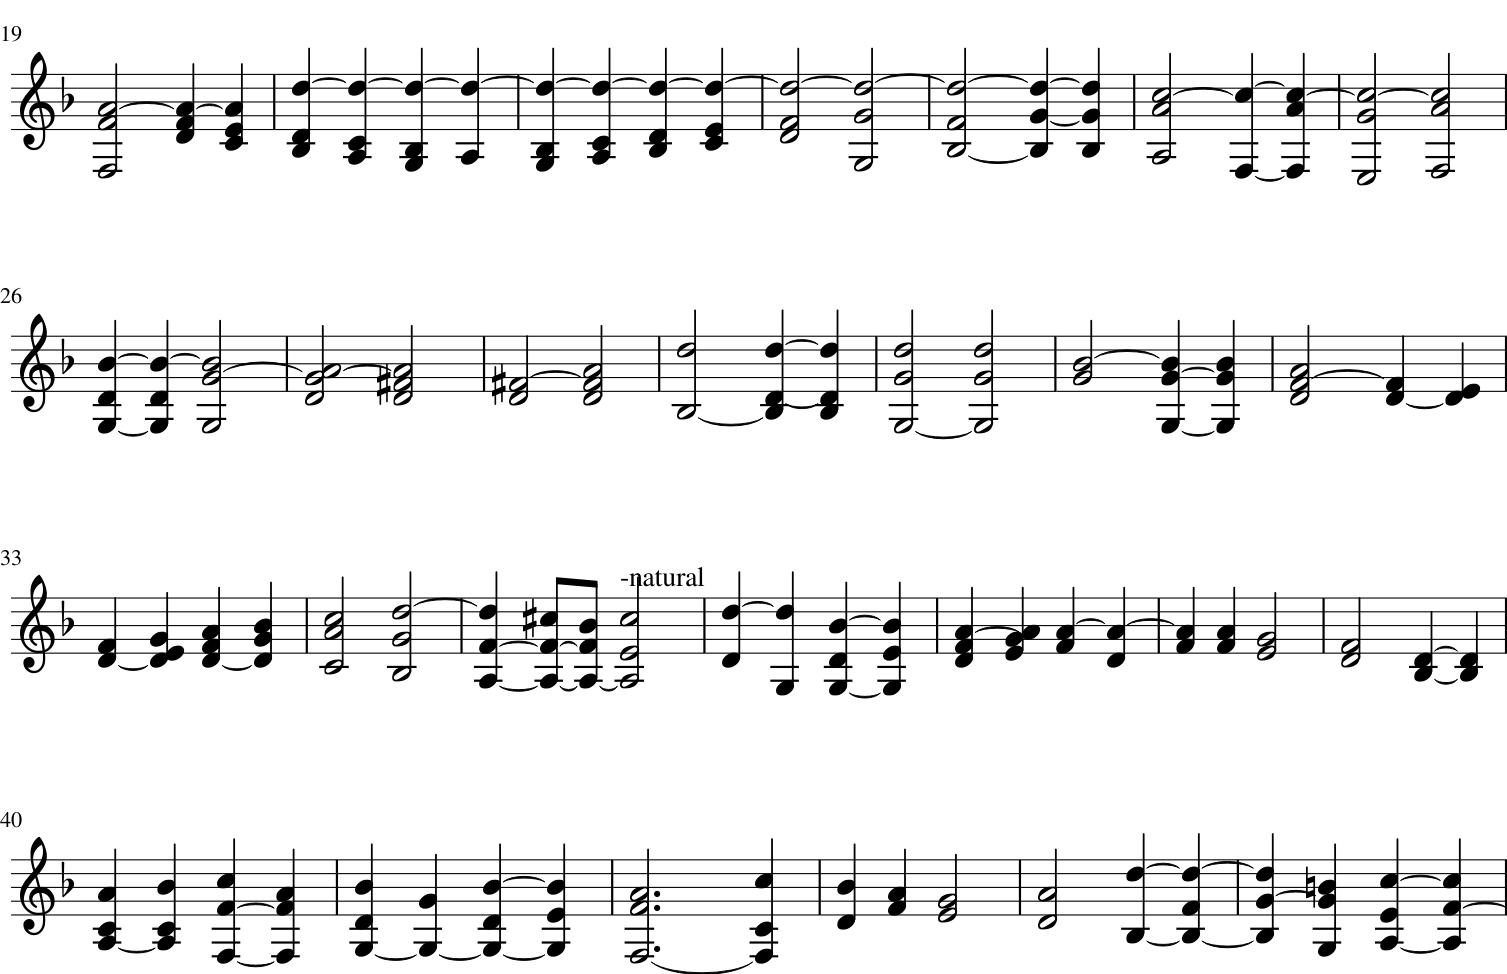

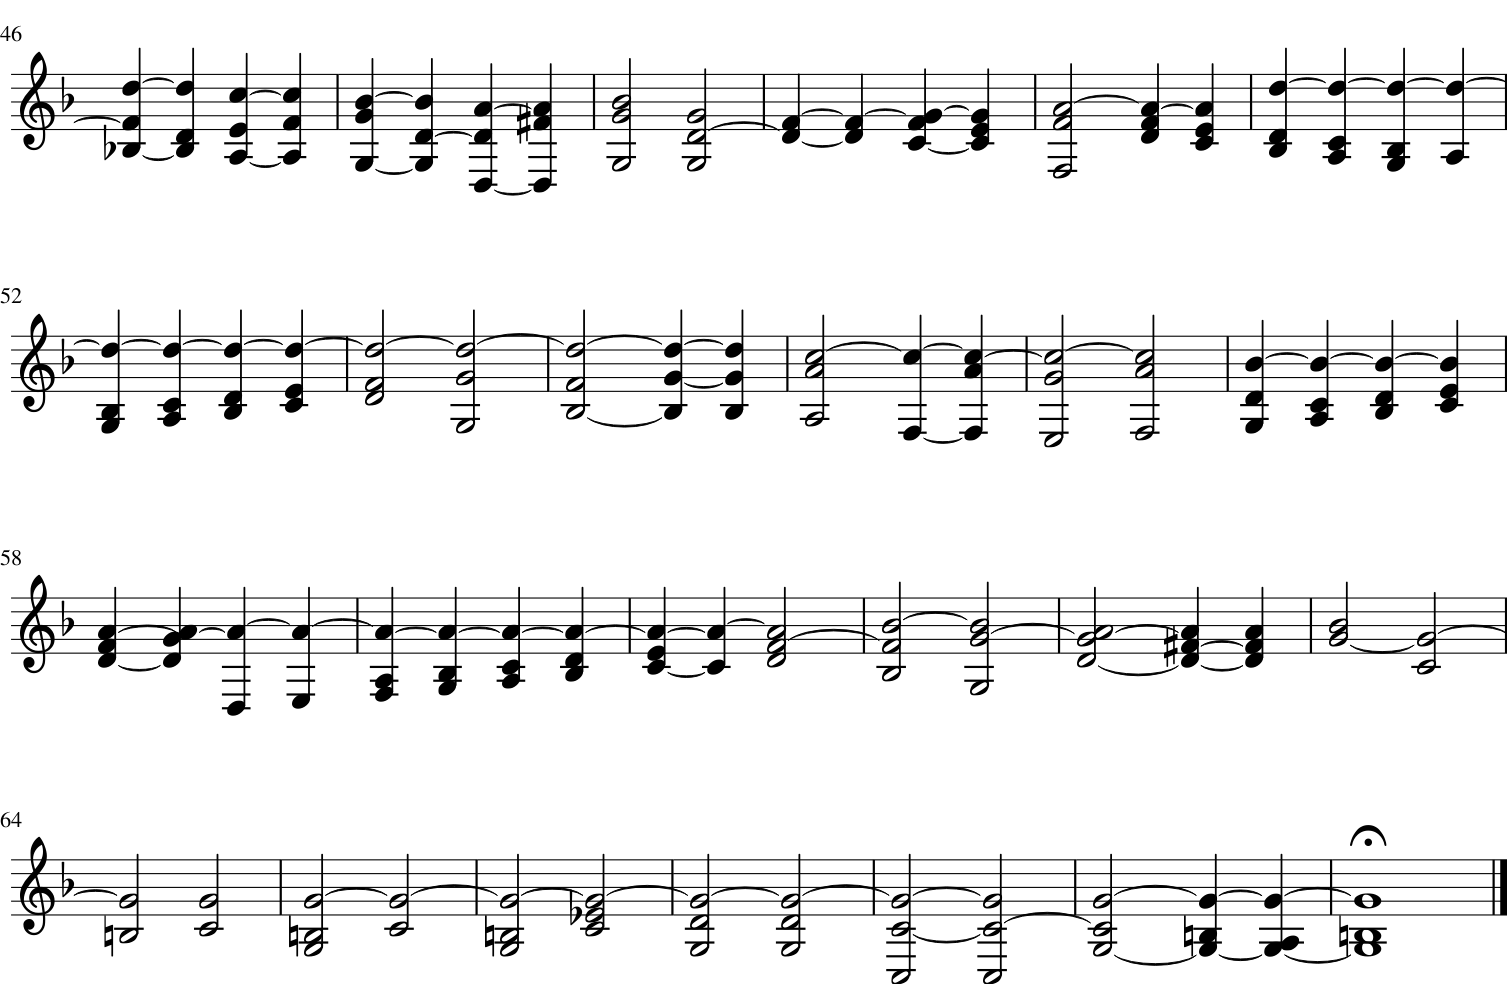

In [15]:
demy.chordify().show()

In [16]:
#Se pueden unir varias partes a un solo archivo

o = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
for s in o:
    print(s)

<music21.stream.Score 0x7d3ab6576d40>
<music21.stream.Score 0x7d3ab7cd00d0>
<music21.stream.Score 0x7d3ab7c02230>
<music21.stream.Score 0x7d3ab7ac5870>
<music21.stream.Score 0x7d3ab7be3f70>


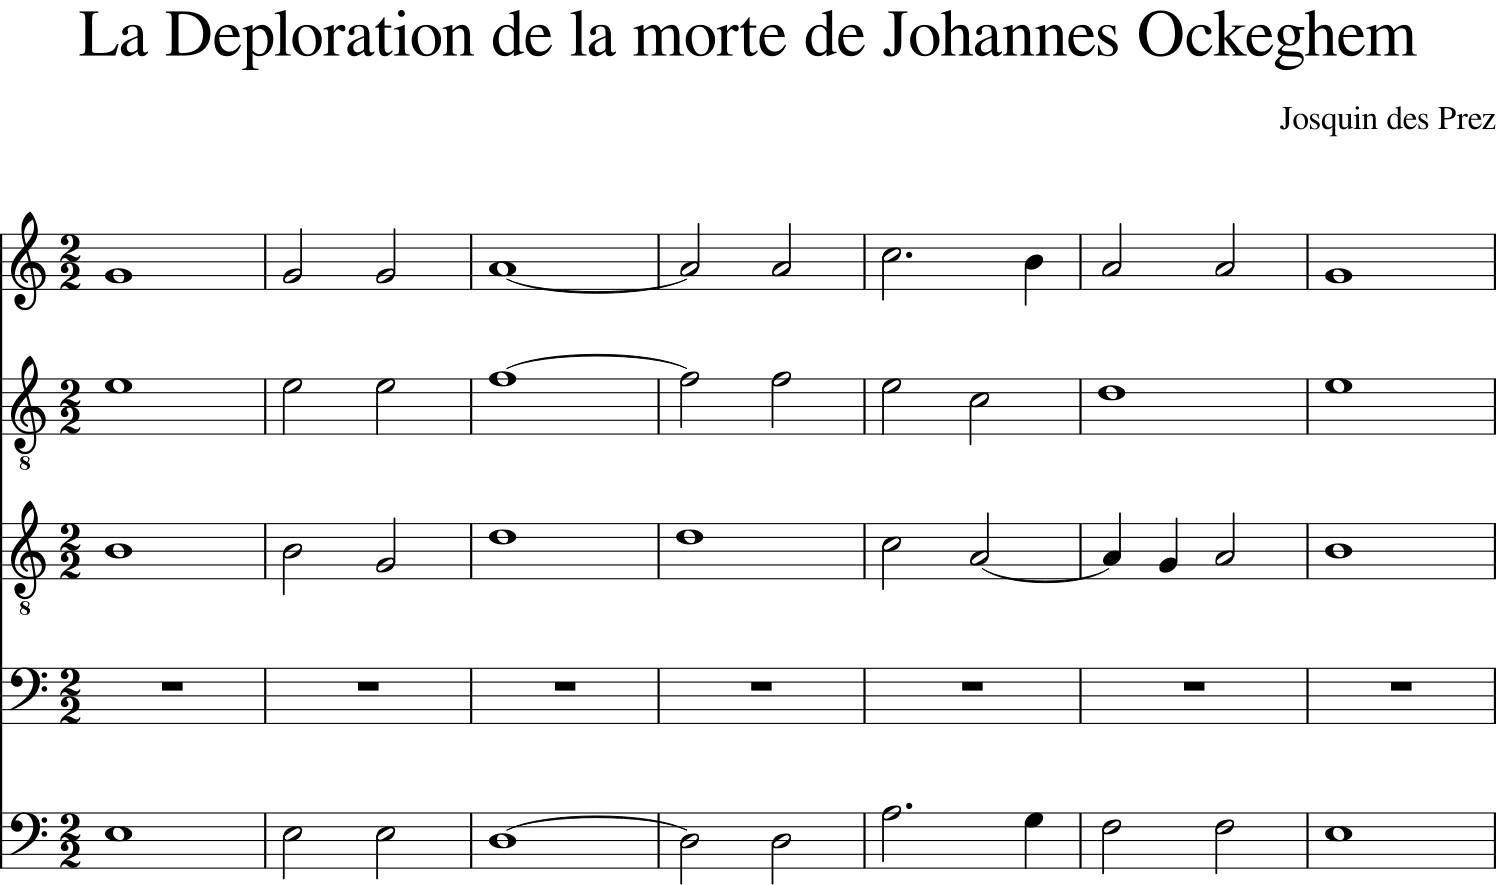

In [17]:
#Merge
mergedScores = o.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133) #Se especifican los compases
scoreExcerpt.show()

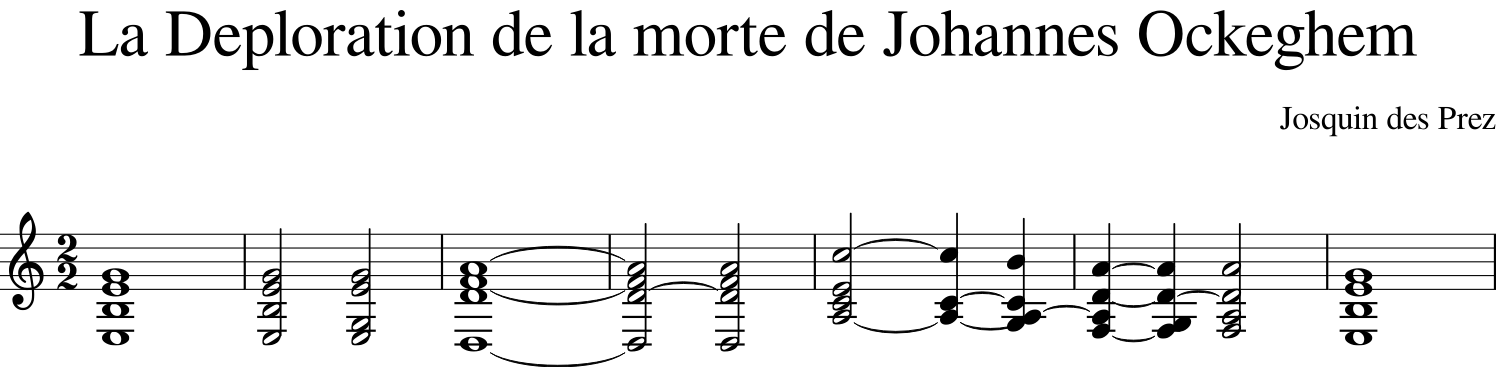

In [18]:
#Otro ejemplo de chordify
reduction = scoreExcerpt.chordify()
reduction.show()

In [19]:
#Asignación de los intervalos en cada uno de los acordes de la partitura
for c in reduction.recurse().getElementsByClass(chord.Chord):
    c.closedPosition(forceOctave=4, inPlace=True)  # Opción para definir si se escriben las octavas o no del acorde
    c.annotateIntervals(inPlace=True)

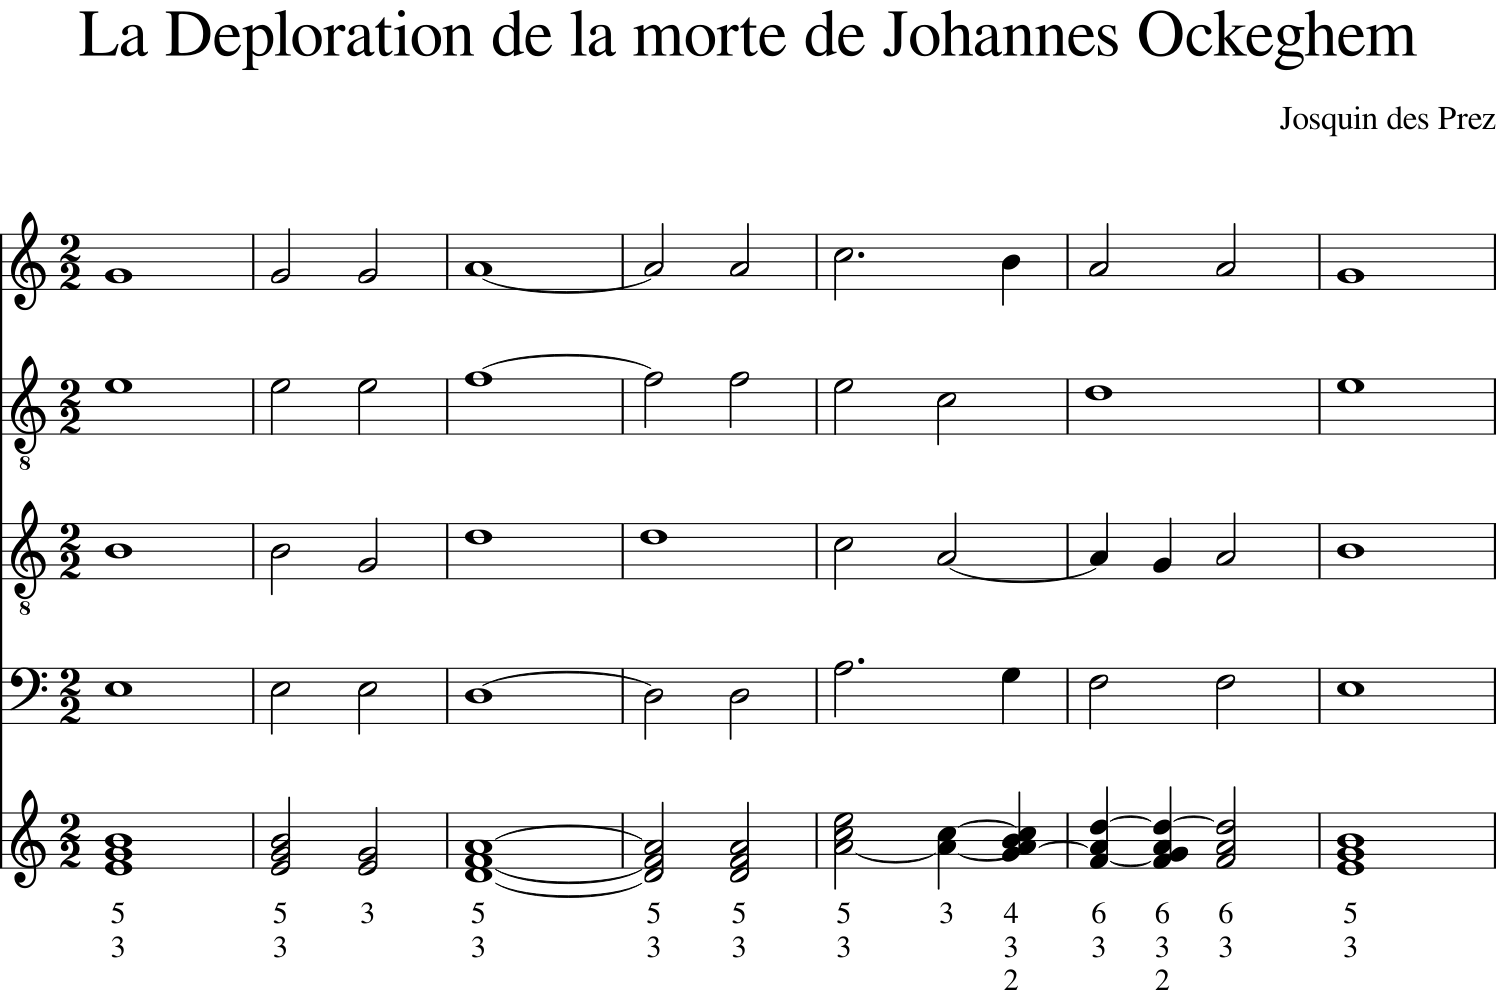

In [20]:
#Nos permite agregar como un sistema extra, le proceso que retorna el chordify
scoreExcerpt.insert(0, reduction)
emptyPart = scoreExcerpt.parts[3]
scoreExcerpt.remove(emptyPart)
scoreExcerpt.show()


In [21]:
#Imprimir los resultados

for c in reduction.recurse().getElementsByClass('Chord'):
    print(c, end=" ")
    for l in c.lyrics:
        print(l.text, end=" ")
    print()

<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4 B4> 5 3 
<music21.chord.Chord E4 G4> 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord D4 F4 A4> 5 3 
<music21.chord.Chord A4 C5 E5> 5 3 
<music21.chord.Chord A4 C5> 3 
<music21.chord.Chord G4 A4 B4 C5> 4 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord F4 G4 A4 D5> 6 3 2 
<music21.chord.Chord F4 A4 D5> 6 3 
<music21.chord.Chord E4 G4 B4> 5 3 


---------------

Aplicando el __chordify__ a el _MIDI1_ 

In [23]:
midi1 = converter.parse('../Archivos/XML_ejemplos/MIDI1.xml') #Leer el archivo xml
for s in midi1:
    print(s)

<music21.stream.PartStaff P1-Staff1>
<music21.stream.PartStaff P1-Staff2>
<music21.layout.ScoreLayout>
<music21.layout.StaffGroup <music21.stream.PartStaff P1-Staff1><music21.stream.PartStaff P1-Staff2>>


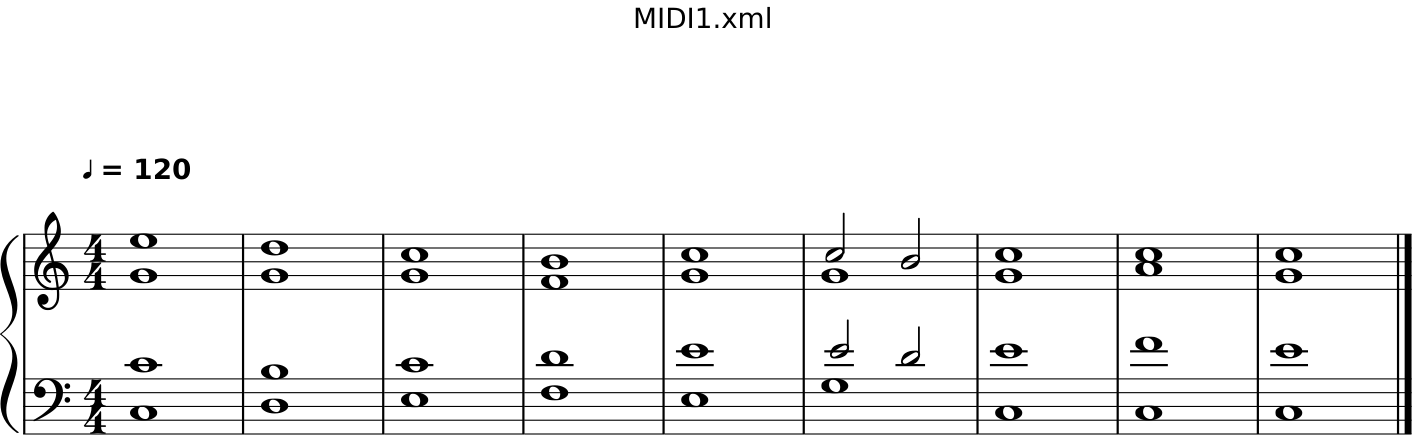

In [24]:
#Visualizar en archivo antes de aplicar el chordify
midi1.show()

In [25]:
midi1_chordify = midi1.chordify() #Se aplica el chordify

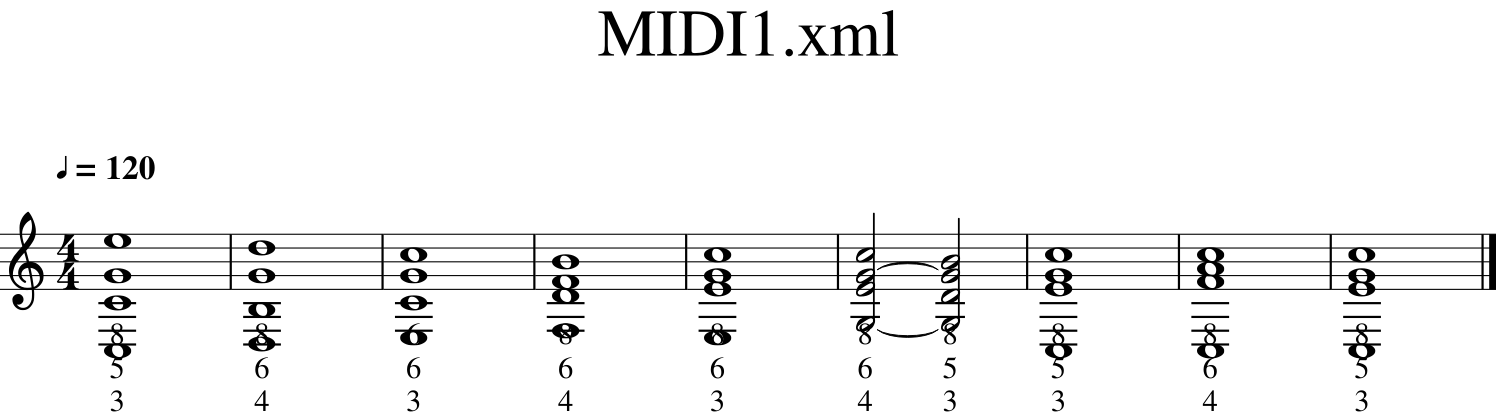

In [26]:
for c in midi1_chordify.recurse().getElementsByClass(chord.Chord):
    #.closedPosition(forceOctave=4, inPlace=True)   #Opción para la octava
    c.annotateIntervals(inPlace=True)

midi1_chordify.show()

In [27]:
#Imprimir los resultados
for c in midi1_chordify.recurse().getElementsByClass('Chord'):
    print(c, end=" ")
    for l in c.lyrics:
        print(l.text, end=" ")
    print()

<music21.chord.Chord C3 C4 G4 E5> 8 5 3 
<music21.chord.Chord D3 B3 G4 D5> 8 6 4 
<music21.chord.Chord E3 C4 G4 C5> 6 6 3 
<music21.chord.Chord F3 D4 F4 B4> 8 6 4 
<music21.chord.Chord E3 E4 G4 C5> 8 6 3 
<music21.chord.Chord G3 E4 G4 C5> 8 6 4 
<music21.chord.Chord G3 D4 G4 B4> 8 5 3 
<music21.chord.Chord C3 E4 G4 C5> 8 5 3 
<music21.chord.Chord C3 F4 A4 C5> 8 6 4 
<music21.chord.Chord C3 E4 G4 C5> 8 5 3 


In [28]:

#Ejemplo especifico, correspondiente al compas 4 del midi1


#Obtener determinada nota
f = midi1_chordify.recurse().getElementsByClass('Chord')[3][0]
si = midi1_chordify.recurse().getElementsByClass('Chord')[3][3]

#Definir el intervalo con las notas 


#Forma1:
#intervalo = interval.notesToInterval(f, si)
#intervalo.niceName

#Forma2:
inter = interval.Interval(f, si)
inter.niceName



'Augmented Eleventh'

El objeto tiene un atributo que cuenta la cantidad de semitonos del intervalo  _.semitones_

In [29]:
inter.semitones-12

6